In [4]:
import Pkg
Pkg.activate(@__DIR__)

  Activating project at `~/github/code/invariance-code`


In [23]:
using Plots, QuadGK
using Distributions, LinearAlgebra

In [12]:
# Plots backend
# pgfplotsx()
gr()

Plots.GRBackend()

# Gaussian Example

$$
f(x, y; \theta) = \boldsymbol{\theta}^{\mathsf T}\boldsymbol{\Phi}^{-1}\big(x, y\big) \cdot \mathbb{1}\big(0 \le x, y \le 1\big)
$$
where $\boldsymbol\theta \in SO(2)$

[ Info: Saved animation to /Users/svishwanath/github/code/invariance-code/tmp.gif


Plots.AnimatedGif("/Users/svishwanath/github/code/invariance-code/tmp.gif")
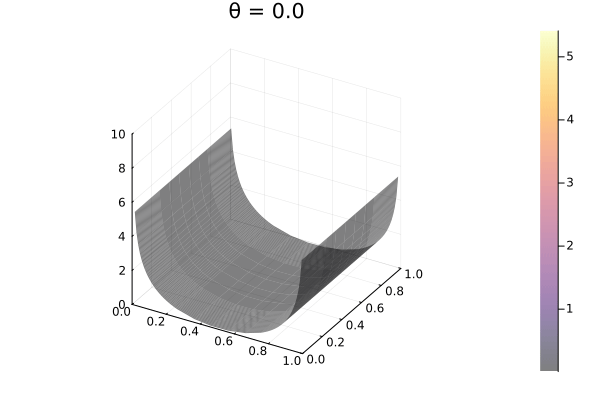

KeyError: KeyError: key "usage_request" not found

In [16]:
@gif for θ ∈ range(0, π, length=100)
    seq = [0:0.01:0.25...; 0.26:0.1:0.74...; 0.75:0.01:1...]
    f(θ) = (x, y) -> ((cos(θ) * quantile(Normal(), x)) + (sin(θ) * quantile(Normal(), y)))^2
    plot(
        seq, seq, f(θ),
        st=:surface,
        title="θ = $(round(θ, digits=3))",
        zlim=(0, 10),
        fa=0.5,
        # c=palette(:viridis, rev=false)
    )
end


## $\Gamma$ Mixture
---

$$
\begin{aligned}
f(x; a, b) &= \begin{cases}
\frac 12 g(ax) & \text{if } x \ge 0\\ \\
\frac 12 g(-bx) & \text{if } x < 0
\end{cases}
\end{aligned}
$$
where,
$$
g \sim \frac 12 \Gamma(10, 5) + \frac 12 \Gamma(10, 2)\quad 
\text{and,} \quad \frac{1}{a} + \frac{1}{b} = 1
$$

In [20]:
w = 0.7
D = MixtureModel([Gamma(10, 5), Gamma(10, 2)], [w, 1 - w])
g(x) = pdf(D, x)
f(θ) = x -> x ≥ 0 ? 0.5 * g(x / θ) : 0.5 * g(-x / (2 - θ))

f (generic function with 1 method)

[ Info: Saved animation to /Users/svishwanath/github/code/invariance-code/tmp.gif


Plots.AnimatedGif("/Users/svishwanath/github/code/invariance-code/tmp.gif")
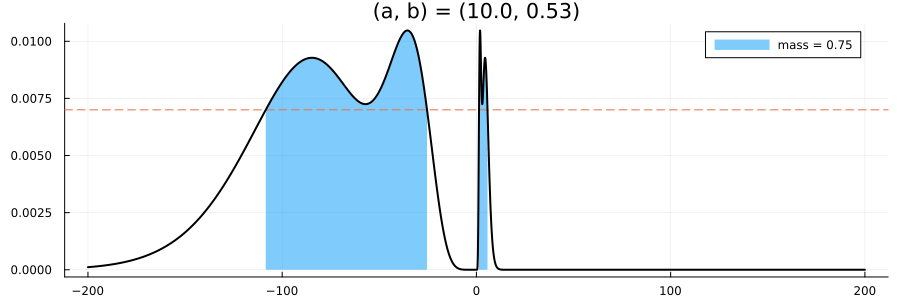

KeyError: KeyError: key "usage_request" not found

In [21]:
a = @animate for θ ∈ range(0.1, 1.9, length=50)
    t = 0.007
    xseq = -200:0.01:200
    ys = map(f(θ), xseq)
    yss = map(x -> x < t ? 0.0 : x, ys)

    h(x) = f(θ)(x) < t ? 0.0 : f(θ)(x)
    area = quadgk(h, -200, 200, rtol=1e-5)[1]

    plt = plot(xseq, yss, fill=0, la=0, fa=0.5, label="mass = $(round(area, digits=3))")
    plt = hline(plt, [t], ls=:dash, lw=1, label="")
    plt = plot(plt, xseq, ys, c=:black, lw=2, label="")


    tit = "(a, b) = $(round.((1/θ, 1/(2-θ)), digits=2))"

    plot(plt, title=tit, size=(900, 300))
end
gif(a, fps=10)

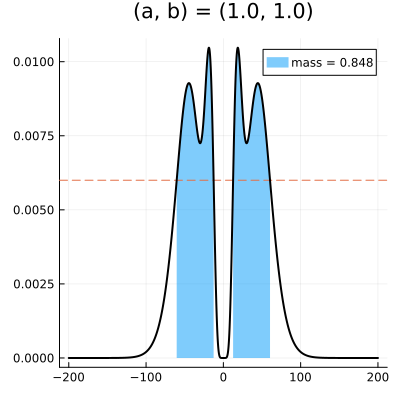

In [22]:
θ = 1.0
# θ = 1.5

t = 0.006
xseq = -200:0.01:200
ys = map(f(θ), xseq)
yss = map(x -> x < t ? 0.0 : x, ys)

h(x) = f(θ)(x) < 0.005 ? 0.0 : f(θ)(x)
area = quadgk(h, -200, 200, rtol=1e-3)[1]

plt = plot(xseq, yss, fill=0, la=0, fa=0.5, label="mass = $(round(area, digits=3))")
plt = hline(plt, [t], ls=:dash, lw=1, label="")
plt = plot(plt, xseq, ys, c=:black, lw=2, label="")


tit = "(a, b) = $(round.((1/θ, 1/(2-θ)), digits=2))"

plot(plt, title=tit, size=(400, 400))

---